(10000, 1000, 10)
(10000, 10)
(10000000, 2)
(10000000, 2)
(10001000, 2)
(10000, 1000, 10)
(10000, 10)
(10000000, 2)
(10000000, 2)
(10001000, 2)


Text(0.5, 1.0, 'Ground Truth')

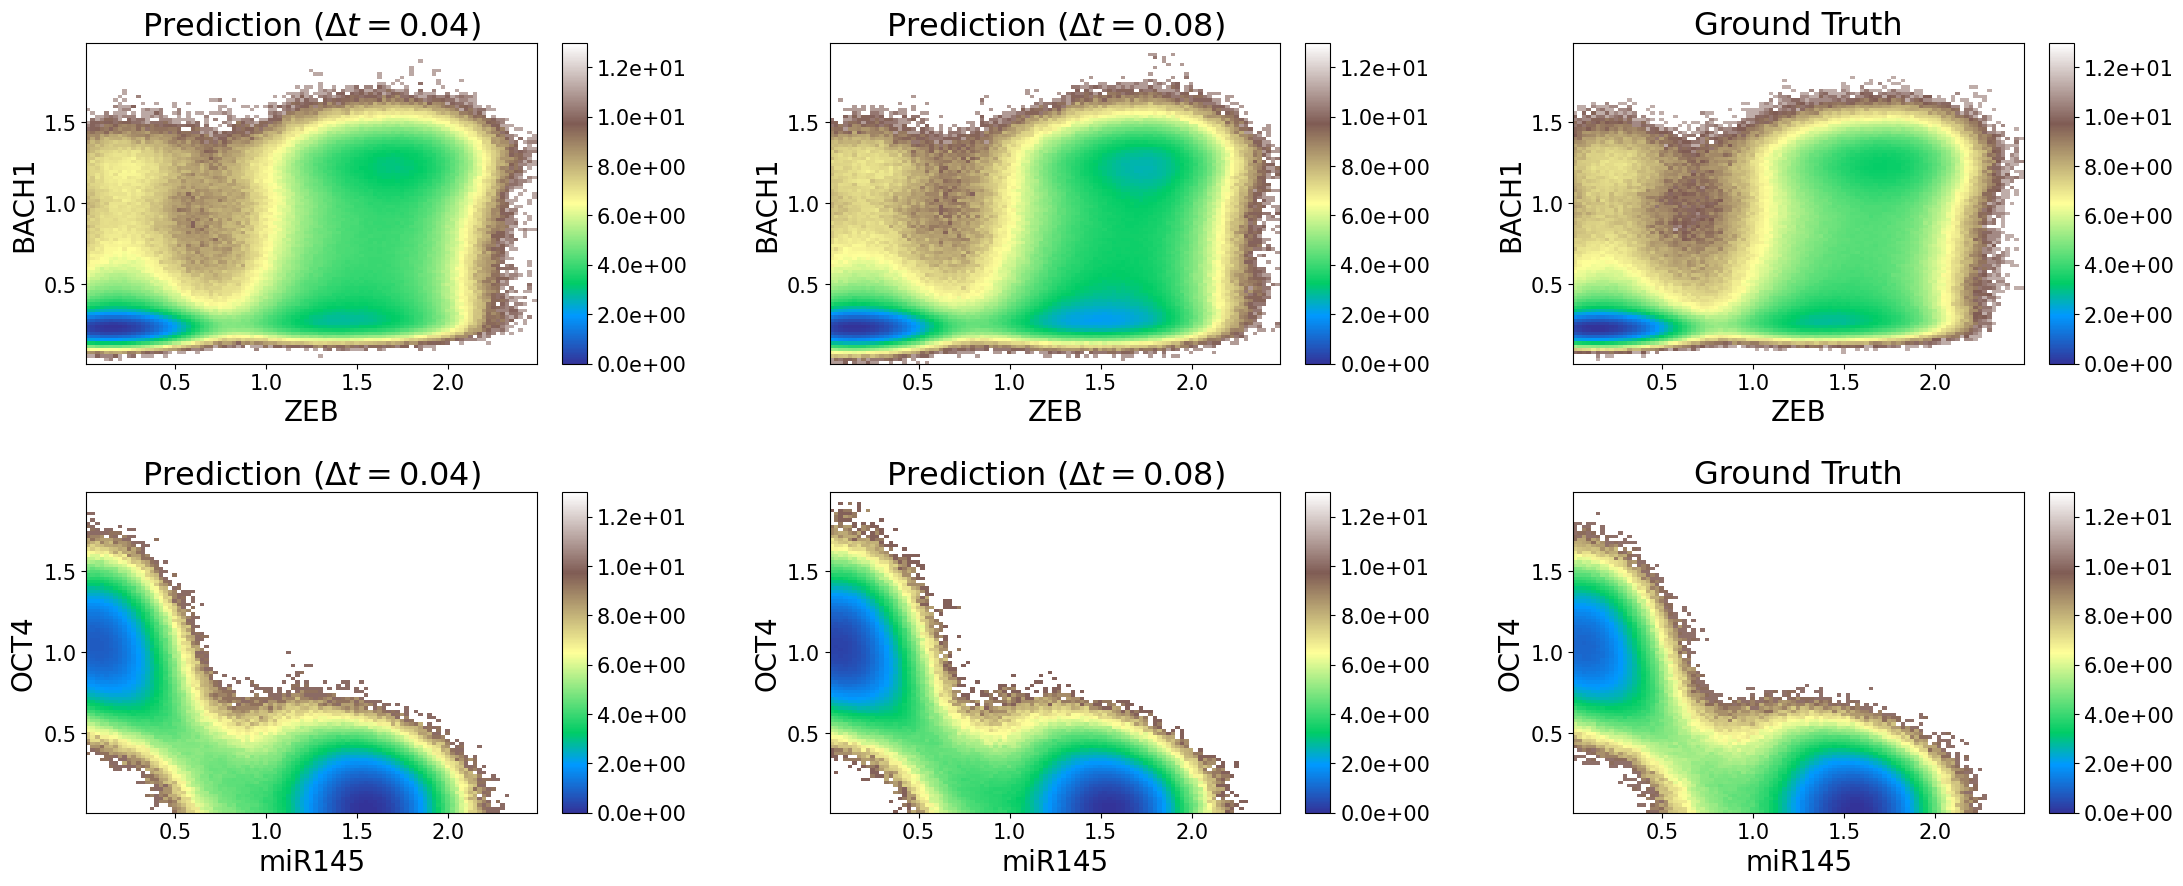

In [8]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from matplotlib import colors


def fe(p):
    a= -np.log(p + 1e-45)
    a=a-a.min()
    return np.clip(a, 0, 0.28/0.02)
N=100
xx     = np.linspace(0,2.5,N+1)
yy     = np.linspace(0,2.,N+1)
xx,yy  = (xx[:-1]+xx[1:])/2,(yy[:-1]+yy[1:])/2
XX,YY  = np.meshgrid(xx,yy)

fig = plt.figure(figsize=(25, 10))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
    wspace=0.65, hspace=0.4)

gs = gridspec.GridSpec(nrows=2, ncols=3, height_ratios=[1, 1])
cmap='terrain'
norm1 = colors.Normalize(vmin=0, vmax=13)
# cmap='inferno'

ax0 = [fig.add_subplot(gs[0,0]), fig.add_subplot(gs[0,1]), fig.add_subplot(gs[0,2])] 

step=100

traj = np.load('EMTdata/ID_pre0.04traj_steps200000_num1000.npy')[-10000:]
print(traj.shape)
print(traj[:,-1,:].shape)
data = (traj).reshape([-1, 10])[:, [1,9]]


print(data.shape)
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[0, 2.5], [0, 2.]],bins=(N, N))
c0= ax0[0].pcolormesh(XX, YY, fe(hist.T/data.shape[0]), norm=norm1, cmap=cmap)


traj = np.load('EMTdata/ID_pre0.08traj_steps200000_num1000.npy')[-10000:]

data = (traj).reshape([-1, 10])[:, [1,9]]
print(data.shape)
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[0, 2.5], [0, 2.]],bins=(N, N))
c1= ax0[1].pcolormesh(XX, YY, fe(hist.T/data.shape[0]), norm=norm1, cmap=cmap)


traj = np.load('EMTdata/ID_truetraj_steps200000_num1000_time1.npy')

data = (traj).reshape([-1, 10])[:, [1,9]]
print(data.shape)
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[0, 2.5], [0, 2.]],bins=(N, N))
c2= ax0[2].pcolormesh(XX, YY, fe(hist.T/data.shape[0]), norm=norm1, cmap=cmap)

cax0 = fig.add_axes([ax0[0].get_position().x1+0.01, ax0[0].get_position().y0,
                    0.01,ax0[0].get_position().height+ ax0[0].get_position().y0-ax0[0].get_position().y0])     
cax1 = fig.add_axes([ax0[1].get_position().x1+0.01, ax0[1].get_position().y0,
                    0.01,ax0[1].get_position().height+ ax0[1].get_position().y0-ax0[1].get_position().y0])
cax2 = fig.add_axes([ax0[2].get_position().x1+0.01, ax0[2].get_position().y0,
                    0.01,ax0[2].get_position().height+ ax0[2].get_position().y0-ax0[2].get_position().y0]) 
cb=fig.colorbar(c0, ax=[ax0[0],ax0[1] ,ax0[2]], cax= cax0, format='%.1e')
cb.ax.tick_params(labelsize=15)
cb=fig.colorbar(c1, ax=[ax0[0],ax0[1] ,ax0[2]], cax= cax1, format='%.1e')
cb.ax.tick_params(labelsize=15)
cb=fig.colorbar(c2, ax=[ax0[0],ax0[1] ,ax0[2]], cax= cax2, format='%.1e')
cb.ax.tick_params(labelsize=15)

xsize=20
for ax in ax0:
    ax.tick_params(labelsize=15)
    ax.set_xlabel('ZEB', fontsize=xsize)
    ax.set_ylabel('BACH1', fontsize=xsize)

ax0[0].set_title('Prediction ($\Delta t=0.04$)', fontsize=23)
ax0[1].set_title('Prediction ($\Delta t=0.08$)', fontsize=23)
ax0[2].set_title('Ground Truth', fontsize=23)


############
ax1 = [fig.add_subplot(gs[1,0]), fig.add_subplot(gs[1,1]), fig.add_subplot(gs[1,2])] 
norm2 = colors.Normalize(vmin=0, vmax=13)

traj = np.load('EMTdata/ID_pre0.04traj_steps200000_num1000.npy')[-10000:]
print(traj.shape)
print(traj[:,-1,:].shape)
data = (traj).reshape([-1, 10])[:, [5,2]]


print(data.shape)
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[0, 2.5], [0, 2.]],bins=(N, N))
c0= ax1[0].pcolormesh(XX, YY, fe(hist.T/data.shape[0]), norm=norm2, cmap=cmap) 


traj = np.load('EMTdata/ID_pre0.08traj_steps200000_num1000.npy')[-10000:]

data = (traj).reshape([-1, 10])[:, [5,2]]
print(data.shape)
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[0, 2.5], [0, 2.]],bins=(N, N))
c1= ax1[1].pcolormesh(XX, YY, fe(hist.T/data.shape[0]), norm=norm2, cmap=cmap) 


traj = np.load('EMTdata/ID_truetraj_steps200000_num1000_time1.npy')

data = (traj).reshape([-1, 10])[:, [5,2]]
print(data.shape)
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[0, 2.5], [0, 2.]],bins=(N, N))
c2= ax1[2].pcolormesh(XX, YY, fe(hist.T/data.shape[0]), norm=norm2, cmap=cmap)

cax0 = fig.add_axes([ax1[0].get_position().x1+0.01, ax1[0].get_position().y0,
                    0.01,ax1[0].get_position().height+ ax1[0].get_position().y0-ax1[0].get_position().y0])     
cax1 = fig.add_axes([ax1[1].get_position().x1+0.01, ax1[1].get_position().y0,
                    0.01,ax1[1].get_position().height+ ax1[1].get_position().y0-ax1[1].get_position().y0])
cax2 = fig.add_axes([ax1[2].get_position().x1+0.01, ax1[2].get_position().y0,
                    0.01,ax1[2].get_position().height+ ax1[2].get_position().y0-ax1[2].get_position().y0]) 
cb=fig.colorbar(c0, ax=[ax1[0],ax1[1] ,ax1[2]], cax= cax0, format='%.1e')
cb.ax.tick_params(labelsize=15)
cb=fig.colorbar(c1, ax=[ax1[0],ax1[1] ,ax1[2]], cax= cax1, format='%.1e')
cb.ax.tick_params(labelsize=15)
cb=fig.colorbar(c2, ax=[ax1[0],ax1[1] ,ax1[2]], cax= cax2, format='%.1e')
cb.ax.tick_params(labelsize=15)

xsize=20
for ax in ax1:
    ax.tick_params(labelsize=15)
    ax.set_xlabel('miR145', fontsize=xsize)
    ax.set_ylabel('OCT4', fontsize=xsize)

ax1[0].set_title('Prediction ($\Delta t=0.04$)', fontsize=23)
ax1[1].set_title('Prediction ($\Delta t=0.08$)', fontsize=23)
ax1[2].set_title('Ground Truth', fontsize=23)

In [9]:
fig.savefig('emt.png', bbox_inches='tight', dpi=100)